In [5]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random
import seaborn as sns 
import matplotlib.pyplot as plt 

np.random.seed(42)

NUM_USERS = 2000
MAX_SESSIONS = 15

events = ["login", "view", "click", "add_to_cart", "purchase", "logout"]
devices = ["desktop","ios","android"]
countries = ["India", "US", "UK", "Canada"]

rows = []
start_date = datetime(2024, 1, 1)

for user_id in range(1, NUM_USERS + 1):
    churned = np.random.rand() < 0.3  # 30% churn
    sessions = np.random.randint(1, MAX_SESSIONS)

    last_time = start_date + timedelta(days=np.random.randint(0, 60))

    for s in range(sessions):
        session_id = f"s_{user_id}_{s}"
        event_count = np.random.randint(2, 10)

        for e in range(event_count):
            event = random.choice(events)
            rows.append([
                user_id,
                event,
                last_time,
                session_id,
                random.choice(devices),
                random.choice(countries)
            ])
            last_time += timedelta(minutes=np.random.randint(1, 8))

        if churned:
            break

df = pd.DataFrame(rows, columns=[
    "user_id", "event_type", "timestamp",
    "session_id", "device", "country"
])

df.to_csv("user_events.csv", index=False)
print("Dataset created:", df.shape)


Dataset created: (61837, 6)


In [6]:
df.head()

,user_id,event_type,timestamp,session_id,device,country
0,1,login,2024-01-15 00:00:00,s_1_0,ios,Canada
1,1,view,2024-01-15 00:05:00,s_1_0,ios,Canada
2,1,login,2024-01-15 00:10:00,s_1_0,android,India
3,1,click,2024-01-15 00:17:00,s_1_0,android,UK
4,1,login,2024-01-15 00:19:00,s_1_1,android,UK


In [7]:
df.describe()

,user_id,timestamp
count,61837.000000,61837
mean,992.821078,2024-01-29 22:24:47.421123584
min,1.000000,2024-01-01 00:00:00
25%,516.000000,2024-01-15 03:10:00
50%,986.000000,2024-01-29 01:29:00
75%,1474.000000,2024-02-14 00:33:00
max,2000.000000,2024-02-29 06:15:00
std,567.488919,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61837 entries, 0 to 61836
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     61837 non-null  int64         
 1   event_type  61837 non-null  object        
 2   timestamp   61837 non-null  datetime64[ns]
 3   session_id  61837 non-null  object        
 4   device      61837 non-null  object        
 5   country     61837 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 2.8+ MB


In [9]:
df.sample(10)

,user_id,event_type,timestamp,session_id,device,country
46767,1491,add_to_cart,2024-01-02 00:30:00,s_1491_1,ios,India
57065,1837,login,2024-01-06 01:20:00,s_1837_2,ios,Canada
59285,1908,view,2024-02-18 01:31:00,s_1908_4,ios,Canada
23785,765,purchase,2024-01-17 01:37:00,s_765_5,android,Canada
37190,1169,purchase,2024-02-19 03:08:00,s_1169_10,android,India
34033,1084,view,2024-01-10 00:17:00,s_1084_1,android,UK
14468,489,click,2024-02-17 02:03:00,s_489_4,desktop,UK
12469,417,view,2024-01-26 00:22:00,s_417_1,ios,India
41942,1324,click,2024-02-17 00:39:00,s_1324_2,android,India
43562,1372,purchase,2024-02-01 02:41:00,s_1372_8,desktop,India


In [10]:
from sklearn.preprocessing import OneHotEncoder

In [11]:
oh = OneHotEncoder(sparse_output= False)
oh.fit(df[['country']])
trans_country = oh.transform(df[['country']])

In [12]:
trans_pd_country = pd.DataFrame(
    trans_country,
    columns=oh.get_feature_names_out(['country'])
)


In [13]:
trans_pd_country.sample(10)

,country_Canada,country_India,country_UK,country_US
22074,1.0,0.0,0.0,0.0
39452,0.0,0.0,1.0,0.0
59373,0.0,0.0,0.0,1.0
35849,0.0,0.0,1.0,0.0
21429,1.0,0.0,0.0,0.0
22335,1.0,0.0,0.0,0.0
49112,0.0,0.0,1.0,0.0
57477,1.0,0.0,0.0,0.0
28720,0.0,0.0,1.0,0.0
59321,0.0,0.0,0.0,1.0


In [14]:
df

,user_id,event_type,timestamp,session_id,device,country
0,1,login,2024-01-15 00:00:00,s_1_0,ios,Canada
1,1,view,2024-01-15 00:05:00,s_1_0,ios,Canada
2,1,login,2024-01-15 00:10:00,s_1_0,android,India
3,1,click,2024-01-15 00:17:00,s_1_0,android,UK
4,1,login,2024-01-15 00:19:00,s_1_1,android,UK
...,...,...,...,...,...,...
61832,2000,purchase,2024-01-25 00:20:00,s_2000_0,android,US
61833,2000,add_to_cart,2024-01-25 00:21:00,s_2000_1,ios,US
61834,2000,logout,2024-01-25 00:25:00,s_2000_1,android,India
61835,2000,click,2024-01-25 00:27:00,s_2000_1,android,Canada


In [15]:
df = df.drop('user_id',axis=1)

In [16]:
df = df.drop('country' , axis=1)

In [17]:
df = pd.concat([df,trans_pd_country] , axis= 1)

In [18]:
df

,event_type,timestamp,session_id,device,country_Canada,country_India,country_UK,country_US
0,login,2024-01-15 00:00:00,s_1_0,ios,1.0,0.0,0.0,0.0
1,view,2024-01-15 00:05:00,s_1_0,ios,1.0,0.0,0.0,0.0
2,login,2024-01-15 00:10:00,s_1_0,android,0.0,1.0,0.0,0.0
3,click,2024-01-15 00:17:00,s_1_0,android,0.0,0.0,1.0,0.0
4,login,2024-01-15 00:19:00,s_1_1,android,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
61832,purchase,2024-01-25 00:20:00,s_2000_0,android,0.0,0.0,0.0,1.0
61833,add_to_cart,2024-01-25 00:21:00,s_2000_1,ios,0.0,0.0,0.0,1.0
61834,logout,2024-01-25 00:25:00,s_2000_1,android,0.0,1.0,0.0,0.0
61835,click,2024-01-25 00:27:00,s_2000_1,android,1.0,0.0,0.0,0.0


In [19]:
oh.fit(df[['device']])

,categories,'auto'
,drop,None
,sparse_output,False
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'
,min_frequency,None
,max_categories,None
,feature_name_combiner,'concat'


In [20]:
device_pd= pd.DataFrame(oh.transform(df[['device']]),columns = oh.get_feature_names_out(['device']))

In [21]:
df = df.drop('device',axis=1)
df=pd.concat([df,device_pd],axis=1)

In [22]:
df= df.drop('session_id',axis=1)

In [23]:
df

,event_type,timestamp,country_Canada,country_India,country_UK,country_US,device_android,device_desktop,device_ios
0,login,2024-01-15 00:00:00,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,view,2024-01-15 00:05:00,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,login,2024-01-15 00:10:00,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,click,2024-01-15 00:17:00,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,login,2024-01-15 00:19:00,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
61832,purchase,2024-01-25 00:20:00,0.0,0.0,0.0,1.0,1.0,0.0,0.0
61833,add_to_cart,2024-01-25 00:21:00,0.0,0.0,0.0,1.0,0.0,0.0,1.0
61834,logout,2024-01-25 00:25:00,0.0,1.0,0.0,0.0,1.0,0.0,0.0
61835,click,2024-01-25 00:27:00,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [24]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

df['hour'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.dayofweek
df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)

df = df.drop('timestamp', axis=1)


In [25]:
df

,event_type,country_Canada,country_India,country_UK,country_US,device_android,device_desktop,device_ios,hour,day_of_week,is_weekend
0,login,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0
1,view,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0
2,login,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,0,0
3,click,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,0,0
4,login,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
61832,purchase,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0,3,0
61833,add_to_cart,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,3,0
61834,logout,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,3,0
61835,click,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,3,0


In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
trans_event = pd.DataFrame(le.fit_transform(df['event_type']),columns = ['event_type'])

In [27]:
df['churn'] = (df['event_type'] != 'purchase').astype(int)
X = df.drop(['event_type', 'churn'], axis=1)
y = df['churn'].values.ravel()


In [28]:
df.sample(20)

,event_type,country_Canada,country_India,country_UK,country_US,device_android,device_desktop,device_ios,hour,day_of_week,is_weekend,churn
13993,logout,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0,1,0,1
11716,logout,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3,6,1,1
43741,view,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,6,1,1
50442,purchase,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,5,1,0
56402,logout,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,4,0,1
41728,login,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3,0,0,1
46132,logout,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,1,0,1
59634,add_to_cart,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,0,0,1
17794,login,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,2,0,1
11627,add_to_cart,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0,1


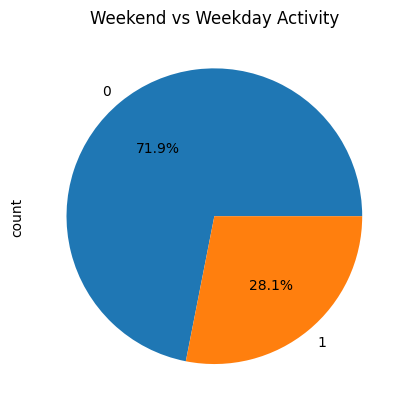

In [29]:
df['is_weekend'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Weekend vs Weekday Activity')
plt.show()


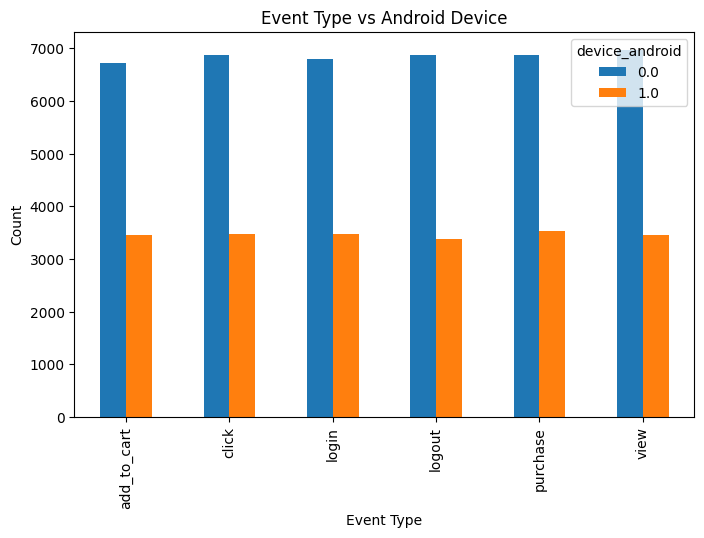

In [30]:
event_device = pd.crosstab(df['event_type'], df['device_android'])
event_device.plot(kind='bar', figsize=(8,5))
plt.title('Event Type vs Android Device')
plt.xlabel('Event Type')
plt.ylabel('Count')
plt.show()

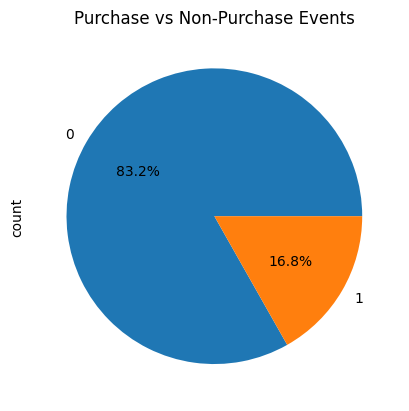

In [31]:
df['is_purchase'] = (df['event_type'] == 'purchase').astype(int)
df['is_purchase'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Purchase vs Non-Purchase Events')
plt.show()

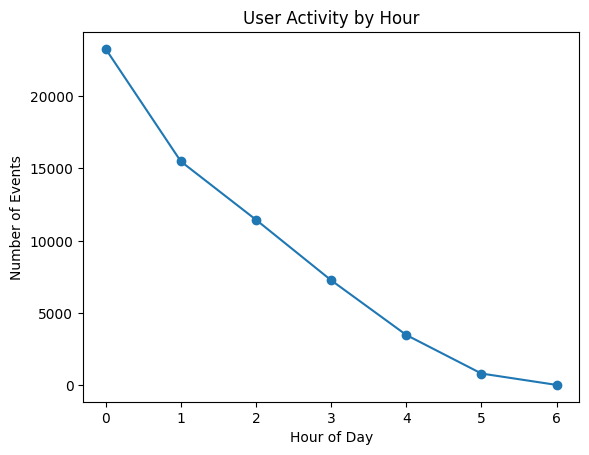

In [32]:
df.groupby('hour').size().plot(kind='line', marker='o')
plt.title('User Activity by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Events')
plt.show()

In [33]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2, random_state = 42, stratify=y)

In [34]:
df['event_type'].isnull().sum()

np.int64(0)

In [35]:
df

,event_type,country_Canada,country_India,country_UK,country_US,device_android,device_desktop,device_ios,hour,day_of_week,is_weekend,churn,is_purchase
0,login,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,1,0
1,view,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,1,0
2,login,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,0,0,1,0
3,click,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,0,0,1,0
4,login,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61832,purchase,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0,3,0,0,1
61833,add_to_cart,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,3,0,1,0
61834,logout,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,3,0,1,0
61835,click,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,3,0,1,0


In [36]:
df.sample(5)

,event_type,country_Canada,country_India,country_UK,country_US,device_android,device_desktop,device_ios,hour,day_of_week,is_weekend,churn,is_purchase
44340,click,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,6,1,1,0
45045,view,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,3,0,1,0
7554,logout,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,4,0,1,0
10688,view,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1,5,1,1,0
22095,add_to_cart,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2,0,0,1,0


In [37]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=800,
    max_depth=20,
    min_samples_leaf=10,
    max_features='sqrt',
    class_weight='balanced',
    random_state=42
)


rf.fit(X_train, y_train)


,n_estimators,800
,criterion,'gini'
,max_depth,20
,min_samples_split,2
,min_samples_leaf,10
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [38]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.17      0.47      0.25      2078
           1       0.83      0.53      0.65     10290

    accuracy                           0.52     12368
   macro avg       0.50      0.50      0.45     12368
weighted avg       0.72      0.52      0.58     12368



array([[ 970, 1108],
       [4801, 5489]])